### Floquet eigen values and states from Mean field Hamiltonian

For a single frequency


after one time period--

 floquet matrix is
 [[0.99988596+0.01510319j 0.        +0.j        ]
 [0.        +0.j         0.99988596-0.01510319j]]

 eigen values are 
 (0.9998859618474283+0.01510318946662199j) (0.9998859618474283-0.01510318946662199j)

 eigen vectors are 
 [1.+0.j 0.+0.j] [0.+0.j 1.+0.j]

 sz with after one time cycle when inital state is (1 0)
 (1.0000000430316214+0j)

 sz with after one time cycle when inital state is (0 1)

 (-1.0000000430316214+0j)


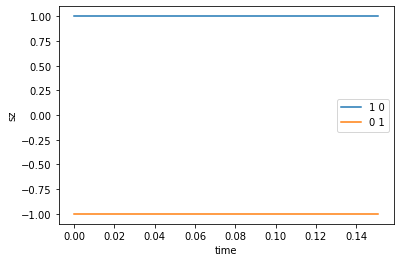

In [38]:
import numpy as np
from odeintw import odeintw
from numpy.linalg import multi_dot, norm, eig
from scipy.signal import find_peaks
from scipy.special import j0
import matplotlib.pyplot as plt

h = 25.0
h0 = 0.1
w = 41.6
T = 2 * np.pi/w
steps = 1000
t = np.linspace(0, T, steps)

psi0 = np.array([1+0.j, 0+0.j])
psi1 = np.array([0+0.j, 1+0.j])

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

sol_mf0 = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
sol_mf1 = odeintw(mf_func, psi1, t, args=(h0, h, w), Dfun=mf_jac)

u = sol_mf0[steps-1]
v = sol_mf1[steps-1]
floq_mat = np.array([u,v])
evals, evecs = eig(floq_mat)

print("\nafter one time period--")
print("\n floquet matrix is\n",floq_mat)
print("\n eigen values are \n",evals[0],evals[1])
print("\n eigen vectors are \n",evecs[0],evecs[1])

mz_mf0 = np.einsum("ij,jk,ik->i", sol_mf0.conjugate(), sz, sol_mf0)
mz_mf1 = np.einsum("ij,jk,ik->i", sol_mf1.conjugate(), sz, sol_mf1)

print("\n sz with after one time cycle when inital state is (1 0)\n", mz_mf0[steps-1])
print("\n sz with after one time cycle when inital state is (0 1)\n\n", mz_mf1[steps-1])
plt.plot(t,mz_mf0.real,label="1 0")
plt.plot(t,mz_mf1.real,label="0 1")
plt.legend()
plt.xlabel('time')
plt.ylabel('sz')
plt.ylim(-1.1,1.1)
plt.show()

## floquet matrix evolution in frequency spectrum

A few number of frequencies

run starts with amplitude 75.0


<ipython-input-48-55ee11ee5575>:52: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc0[i] = (1j)* np.log(evals[0])/T
<ipython-input-48-55ee11ee5575>:53: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc1[i] = (1j)* np.log(evals[1])/T


time taken 0.3208086093266805 minutes


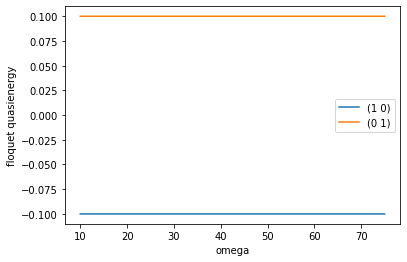

In [48]:
import numpy as np
from odeintw import odeintw
from numpy.linalg import multi_dot, norm, eig
from scipy.signal import find_peaks
from scipy.special import j0
import matplotlib.pyplot as plt
import time
import cmath

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

h = 75.0
h0 = 0.1
steps = 1000
psi0 = np.array([1+0.j, 0+0.j])
psi1 = np.array([0+0.j, 1+0.j])
omegas = np.linspace(10.0,75.0,500)

eigval0,eigvec0,eigval1,eigvec1 = [],[],[],[]
phasefunc0,phasefunc1 = np.zeros(len(omegas)), np.zeros(len(omegas))
start = time.time()
print("run starts with amplitude",h)

for i,w in enumerate(omegas):
    T = 2 * np.pi/w  
    t = np.linspace(0, T, steps)

    sol_mf0 = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
    sol_mf1 = odeintw(mf_func, psi1, t, args=(h0, h, w), Dfun=mf_jac)

    u = sol_mf0[steps-1]
    v = sol_mf1[steps-1]
    floq_mat = np.array([u,v])
    evals, evecs = eig(floq_mat)
    
    eigval0.append(evals[0])
    eigvec0.append(evecs[0])
    eigval1.append(evals[1])    
    eigvec1.append(evecs[1])

    phasefunc0[i] = (1j)* np.log(evals[0])/T
    phasefunc1[i] = (1j)* np.log(evals[1])/T

print("time taken",(time.time()-start)/60.0,"minutes")    

plt.plot(omegas,phasefunc0.real, label = "(1 0)")
plt.plot(omegas,phasefunc1.real, label = "(0 1)")
plt.legend()
plt.xlabel('omega')
plt.ylabel('floquet quasienergy')
plt.show()

run starts with amplitude 25.0


<ipython-input-32-3f658688db25>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc0[i] = (1j)* np.log(evals[0])/T
<ipython-input-32-3f658688db25>:57: RuntimeWarning: divide by zero encountered in log
  phasefunc1[i] = (1j)* np.log(evals[1])/T
<ipython-input-32-3f658688db25>:57: RuntimeWarning: invalid value encountered in cdouble_scalars
  phasefunc1[i] = (1j)* np.log(evals[1])/T
<ipython-input-32-3f658688db25>:57: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc1[i] = (1j)* np.log(evals[1])/T


time taken 0.24953275124231974 minutes
run starts with amplitude 50.0


<ipython-input-32-3f658688db25>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc0[i] = (1j)* np.log(evals[0])/T
<ipython-input-32-3f658688db25>:57: RuntimeWarning: divide by zero encountered in log
  phasefunc1[i] = (1j)* np.log(evals[1])/T
<ipython-input-32-3f658688db25>:57: RuntimeWarning: invalid value encountered in cdouble_scalars
  phasefunc1[i] = (1j)* np.log(evals[1])/T
<ipython-input-32-3f658688db25>:57: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc1[i] = (1j)* np.log(evals[1])/T


time taken 0.3249988357226054 minutes
run starts with amplitude 75.0


<ipython-input-32-3f658688db25>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc0[i] = (1j)* np.log(evals[0])/T
<ipython-input-32-3f658688db25>:57: RuntimeWarning: divide by zero encountered in log
  phasefunc1[i] = (1j)* np.log(evals[1])/T
<ipython-input-32-3f658688db25>:57: RuntimeWarning: invalid value encountered in cdouble_scalars
  phasefunc1[i] = (1j)* np.log(evals[1])/T
<ipython-input-32-3f658688db25>:57: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc1[i] = (1j)* np.log(evals[1])/T


time taken 0.4009923815727234 minutes


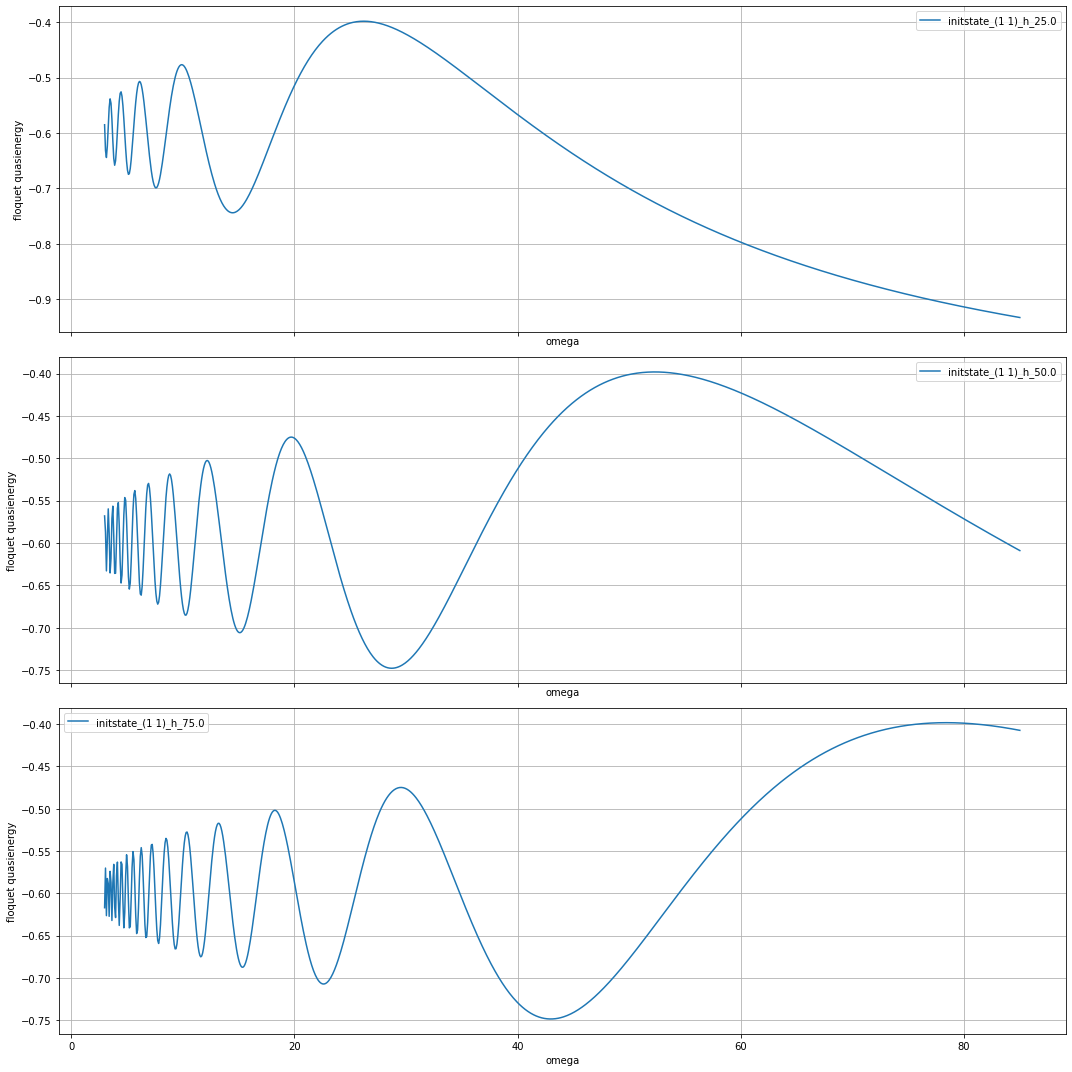

In [32]:
import numpy as np
from odeintw import odeintw
from numpy.linalg import multi_dot, norm, eig
from scipy.signal import find_peaks
from scipy.special import j0
import matplotlib.pyplot as plt
import time
import cmath


sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

hs = np.array([25.0, 50.0, 75.0])
h0 = 0.1
steps = 1000
psi0 = 1/np.sqrt(2) * np.array([1+0.j, 1+0.j])
psi1 = np.array([0+0.j, 0+0.j])
omegas = np.linspace(3.0,85.0,1000)
fig, axs = plt.subplots(len(hs), 1, sharex='col', figsize=(15,15))

eigval0,eigvec0,eigval1,eigvec1 = [],[],[],[]
phasefunc0,phasefunc1 = np.zeros(len(omegas)), np.zeros(len(omegas))


for j,h in enumerate(hs):
    start = time.time()
    print("run starts with amplitude",h)
    for i,w in enumerate(omegas):
        T = 2 * np.pi/w  
        t = np.linspace(0, T, steps)
    
        sol_mf0 = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
        sol_mf1 = odeintw(mf_func, psi1, t, args=(h0, h, w), Dfun=mf_jac)
    
        u = sol_mf0[steps-1]
        v = sol_mf1[steps-1]
        floq_mat = np.array([u,v])
        evals, evecs = eig(floq_mat)
        
        eigval0.append(evals[0])
        eigvec0.append(evecs[0])
        eigval1.append(evals[1])    
        eigvec1.append(evecs[1])
    
        phasefunc0[i] = (1j)* np.log(evals[0])/T
        phasefunc1[i] = (1j)* np.log(evals[1])/T
    
    print("time taken",(time.time()-start)/60.0,"minutes")    
    plotname = "initstate_(1 1)_h_"+ str(h)
    axs[j].plot(omegas,phasefunc0.real, label = plotname)
    #axs[j].plot(omegas,phasefunc1.real, label = "(0 0)")
    axs[j].legend()
    axs[j].grid()
    axs[j].set_xlabel('omega')
    axs[j].set_ylabel('floquet quasienergy')
fig.tight_layout()
fig.savefig("multiple_h.jpeg",dpi=300)

## Floquet dynamics in position space

Check T. Mori's paper equation (12)

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from multiprocessing import Pool
import time

fs = 15
nprocs = 2

N = 100
p = np.zeros(N)
h = 25.0

q = np.linspace(-1.0,1.0,N)
init_matrix = np.eye(N, dtype = float)

def cosp():
    for l in 

if __name__ == '__main__':
    p = Pool(processes = nprocs)
    print("Floquet dynamics for h = %f, w = %f with %d processes ..." % (h, omega, nprocs))
    start = time.time()
    poincare_data = p.starmap(poincare_sec,[(x0, p0, nmax, (h0, h, omega)) for x0, p0 in zip(init_x, init_p)])